<a href="https://colab.research.google.com/github/ferperezh/IIC3633_ProyectoMetricaDiversidad/blob/main/procesamiento_musica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesamiento de data de Musica

Primero creamos una instancia para descargar los archivos de musica de kaggle. Pero primero debes subir al colab el archivo `kaggle.json` con el usuario y permisos del kaggle.


In [2]:
# Crear el directorio .kaggle en Colab
!mkdir -p ~/.kaggle

# Mover el archivo kaggle.json al directorio .kaggle
!cp kaggle.json ~/.kaggle/

# Cambiar los permisos del archivo kaggle.json para asegurar privacidad
!chmod 600 ~/.kaggle/kaggle.json


Instalamos la libreria kaggle para poder usarla

In [3]:
!pip install kaggle

Primero descargamos el dataset de [kaggle_music_data](https://www.kaggle.com/datasets/saurabhshahane/music-dataset-1950-to-2019/data). Para tener más información de la cancion.



In [4]:
# Descargar el dataset
!kaggle datasets download -d saurabhshahane/music-dataset-1950-to-2019

# Descomprimir el archivo zip descargado
import zipfile
with zipfile.ZipFile("music-dataset-1950-to-2019.zip", 'r') as zip_ref:
    zip_ref.extractall("music_dataset")

print("Path to dataset files: music_dataset")


Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/music-dataset-1950-to-2019
License(s): Attribution 4.0 International (CC BY 4.0)
 82% 8.00M/9.73M [00:01<00:00, 12.7MB/s]
100% 9.73M/9.73M [00:01<00:00, 8.95MB/s]
Path to dataset files: music_dataset


In [5]:
# Verificar archivos en el directorio
!ls music_dataset


tcc_ceds_music.csv


Despues descargamos el dataset de [kaggle_lastfm](https://www.kaggle.com/datasets/harshal19t/lastfm-dataset) para tener las canciones por usuario.

In [6]:
# Descargar el dataset de Last.fm
!kaggle datasets download -d harshal19t/lastfm-dataset

# Descomprimir el archivo zip descargado
import zipfile
with zipfile.ZipFile("lastfm-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("lastfm_dataset")

print("Path to dataset files: lastfm_dataset")


Dataset URL: https://www.kaggle.com/datasets/harshal19t/lastfm-dataset
License(s): copyright-authors
100% 3.93M/3.93M [00:00<00:00, 5.91MB/s]
100% 3.93M/3.93M [00:00<00:00, 4.33MB/s]
Path to dataset files: lastfm_dataset


In [7]:
!ls lastfm_dataset


Last.fm_data.csv


Ahora se carga los archivos .csv para poder unirlos y tener la información sobre cada canción para poder hacer la categorización de las canciones.

In [11]:
import pandas as pd

music_data = pd.read_csv("music_dataset/tcc_ceds_music.csv")
lastfm = pd.read_csv("lastfm_dataset/Last.fm_data.csv")

In [12]:
music_data.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [13]:
lastfm.head()

,Unnamed: 0,Username,Artist,Track,Album,Date,Time
0,0,Babs_05,Isobel Campbell,The Circus Is Leaving Town,Ballad of the Broken Seas,31 Jan 2021,23:36
1,1,Babs_05,Isobel Campbell,Dusty Wreath,Ballad of the Broken Seas,31 Jan 2021,23:32
2,2,Babs_05,Isobel Campbell,Honey Child What Can I Do?,Ballad of the Broken Seas,31 Jan 2021,23:28
3,3,Babs_05,Isobel Campbell,It's Hard To Kill A Bad Thing,Ballad of the Broken Seas,31 Jan 2021,23:25
4,4,Babs_05,Isobel Campbell,Saturday's Gone,Ballad of the Broken Seas,31 Jan 2021,23:21


In [14]:
#Crear la columna artist song que es el nombre del artista y el nombre de la cancion en minuscula
music_data['artist_song'] = music_data['artist_name'] + "-" + music_data['track_name']
music_data['artist_song'] = music_data['artist_song'].str.lower()

lastfm['artist_song'] = lastfm['Artist'] + "-" + lastfm['Track']
lastfm['artist_song'] = lastfm['artist_song'].str.lower()


In [17]:
usuario_music_data = pd.merge(music_data, lastfm, on='artist_song', how='inner')
usuario_music_data

,Unnamed: 0_x,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,topic,age,artist_song,Unnamed: 0_y,Username,Artist,Track,Album,Date,Time
0,250,the clovers,devil or angel,1956,pop,devil mind like devil dear whichever miss miss...,35,0.001698,0.350897,0.001698,...,violence,0.914286,the clovers-devil or angel,78154,franhale,The Clovers,Devil or Angel,The Clovers,23 Jan 2021,12:44
1,331,eddie cochran,completely sweet,1957,pop,completely sweet baby completely sweet mean ma...,73,0.166586,0.001096,0.001096,...,romantic,0.900000,eddie cochran-completely sweet,117435,eartle,Eddie Cochran,Completely Sweet,Singin' to My Baby,30 Jan 2021,13:03
2,705,the byrds,turn! turn! turn! (to everything there is a se...,1959,pop,turn turn turn season turn turn turn time purp...,95,0.000684,0.106944,0.000684,...,night/time,0.871429,the byrds-turn! turn! turn! (to everything the...,80881,franhale,The Byrds,Turn! Turn! Turn! (To Everything There Is a Se...,Turn! Turn! Turn!,31 Jan 2021,13:31
3,729,fats domino,blueberry hill,1959,pop,thrill blueberry blueberry moon stand blueberr...,24,0.003096,0.003096,0.003096,...,romantic,0.871429,fats domino-blueberry hill,16025,Babs_05,Fats Domino,Blueberry Hill,Fats Domino Swings,02 Jan 2021,00:14
4,735,the platters,smoke gets in your eyes,1959,pop,ask know true true course reply inside deny sa...,45,0.001316,0.001316,0.001316,...,sadness,0.871429,the platters-smoke gets in your eyes,16020,Babs_05,The Platters,Smoke Gets In Your Eyes,Remember When?,02 Jan 2021,00:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8100,82434,q-tip,life is better,2019,hip hop,life fill come fall away play bangin gonna ban...,36,0.001645,0.001645,0.440262,...,world/life,0.014286,q-tip-life is better,145081,massdosage,Q-Tip,Life Is Better,The Renaissance,31 Jan 2021,21:24
8101,82434,q-tip,life is better,2019,hip hop,life fill come fall away play bangin gonna ban...,36,0.001645,0.001645,0.440262,...,world/life,0.014286,q-tip-life is better,202988,Knapster01,Q-Tip,Life Is Better,The Renaissance,31 Jan 2021,21:24
8102,82439,rakim,when i b on tha mic,2019,hip hop,internationally know hardcore real niggas inte...,58,0.001754,0.001754,0.001754,...,obscene,0.014286,rakim-when i b on tha mic,138926,massdosage,Rakim,When I B On Tha Mic,The Master,31 Jan 2021,19:54
8103,82446,the roots,the seed (2.0),2019,hip hop,knock months finna know want neosoul hiphop wa...,61,0.001224,0.001224,0.105172,...,obscene,0.014286,the roots-the seed (2.0),6390,Babs_05,The Roots,The Seed (2.0),Phrenology,31 Jan 2021,23:55


In [20]:
lastfm['Username'].nunique()

11

In [21]:
lastfm['Track'].nunique()

67241

In [19]:
# Ver cuantos usuarios en la columna de username tenemos distintos
usuario_music_data['Username'].nunique()

11

In [22]:
usuario_music_data['Track'].nunique()

2941

In [43]:
lastfm.columns

Index(['Unnamed: 0', 'Username', 'Artist', 'Track', 'Album', 'Date', 'Time',
       'artist_song'],
      dtype='object')

In [23]:
usuario_music_data.columns

Index(['Unnamed: 0_x', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age', 'artist_song', 'Unnamed: 0_y', 'Username', 'Artist',
       'Track', 'Album', 'Date', 'Time'],
      dtype='object')

In [37]:
usuario_music_data.describe()

,Unnamed: 0_x,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age,Unnamed: 0_y
count,8105.000000,8105.000000,8105.000000,8105.000000,8105.000000,8105.000000,8105.000000,8105.000000,8105.000000,8105.000000,...,8105.000000,8105.000000,8105.000000,8105.000000,8.105000e+03,8105.000000,8105.000000,8105.000000,8105.000000,8105.000000
mean,40177.448365,1996.935719,74.875879,0.018882,0.155662,0.110991,0.055720,0.020704,0.012819,0.036517,...,0.140211,0.031343,0.518146,0.705566,2.224350e-01,0.107952,0.484973,0.667089,0.329490,118025.591857
std,29159.223476,15.877211,42.611518,0.046795,0.196394,0.163742,0.108835,0.048674,0.035065,0.085067,...,0.188311,0.072165,0.169008,0.094494,2.822273e-01,0.235868,0.245373,0.223514,0.226817,79909.871402
min,250.000000,1950.000000,1.000000,0.000323,0.000313,0.000306,0.000289,0.000306,0.000289,0.000306,...,0.000313,0.000289,0.045814,0.101402,4.317273e-07,0.000000,0.010202,0.017187,0.014286,45.000000
25%,14487.000000,1985.000000,41.000000,0.000892,0.001224,0.001170,0.001012,0.000975,0.000849,0.000923,...,0.001170,0.000940,0.405394,0.654693,7.107437e-03,0.000003,0.288953,0.519505,0.128571,49640.000000
50%,19940.000000,2000.000000,66.000000,0.001548,0.046593,0.004386,0.002105,0.001698,0.001385,0.001754,...,0.016095,0.001880,0.523448,0.723175,7.821193e-02,0.000576,0.479596,0.695686,0.285714,100379.000000
75%,74453.000000,2011.000000,100.000000,0.003509,0.318418,0.164154,0.062743,0.013869,0.003096,0.028058,...,0.301423,0.033510,0.637171,0.774376,3.664652e-01,0.042308,0.676422,0.854850,0.500000,187832.000000
max,82446.000000,2019.000000,199.000000,0.410892,0.964912,0.950139,0.950139,0.450913,0.386603,0.820339,...,0.850376,0.774820,0.980505,0.895393,9.989960e-01,0.991903,0.996908,1.000000,1.000000,265511.000000


In [29]:
k = 3

user_genre_df = usuario_music_data[['Username', 'genre']]

# Calcular las k categorías más escuchadas por cada usuario
top_k_3_categories = (
    user_genre_df.groupby(['Username', 'genre'])
    .size()  # Contar ocurrencias de cada género por usuario
    .reset_index(name='count')  # Resetear índice y nombrar la columna de conteo
    .sort_values(['Username', 'count'], ascending=[True, False])  # Ordenar por usuario y luego por conteo descendente
    .groupby('Username')  # Agrupar por usuario para obtener los top-k
    .head(k)  # Tomar los K géneros más escuchados por usuario
)

# Mostrar los resultados
print("Top k = 3 géneros más escuchados por usuario:")
top_k_3_categories

Top k = 3 géneros más escuchados por usuario:


,Username,genre,count
4,Babs_05,pop,915
6,Babs_05,rock,576
0,Babs_05,blues,112
11,Knapster01,pop,688
13,Knapster01,rock,403
7,Knapster01,blues,82
18,Orlenay,pop,267
20,Orlenay,rock,120
14,Orlenay,blues,38
25,eartle,pop,491


In [30]:
k = 5

user_genre_df = usuario_music_data[['Username', 'genre']]

# Calcular las k categorías más escuchadas por cada usuario
top_k_5_categories = (
    user_genre_df.groupby(['Username', 'genre'])
    .size()  # Contar ocurrencias de cada género por usuario
    .reset_index(name='count')  # Resetear índice y nombrar la columna de conteo
    .sort_values(['Username', 'count'], ascending=[True, False])  # Ordenar por usuario y luego por conteo descendente
    .groupby('Username')  # Agrupar por usuario para obtener los top-k
    .head(k)  # Tomar los K géneros más escuchados por usuario
)

# Mostrar los resultados
print("Top k = 5 géneros más escuchados por usuario:")
top_k_5_categories

Top k = 5 géneros más escuchados por usuario:


,Username,genre,count
4,Babs_05,pop,915
6,Babs_05,rock,576
0,Babs_05,blues,112
3,Babs_05,jazz,90
1,Babs_05,country,24
11,Knapster01,pop,688
13,Knapster01,rock,403
7,Knapster01,blues,82
10,Knapster01,jazz,79
8,Knapster01,country,45


In [31]:
k = 7

user_genre_df = usuario_music_data[['Username', 'genre']]

# Calcular las k categorías más escuchadas por cada usuario
top_k_7_categories = (
    user_genre_df.groupby(['Username', 'genre'])
    .size()  # Contar ocurrencias de cada género por usuario
    .reset_index(name='count')  # Resetear índice y nombrar la columna de conteo
    .sort_values(['Username', 'count'], ascending=[True, False])  # Ordenar por usuario y luego por conteo descendente
    .groupby('Username')  # Agrupar por usuario para obtener los top-k
    .head(k)  # Tomar los K géneros más escuchados por usuario
)

# Mostrar los resultados
print("Top k = 7 géneros más escuchados por usuario:")
top_k_7_categories

Top k = 7 géneros más escuchados por usuario:


,Username,genre,count
4,Babs_05,pop,915
6,Babs_05,rock,576
0,Babs_05,blues,112
3,Babs_05,jazz,90
1,Babs_05,country,24
...,...,...,...
68,mremond,pop,15
65,mremond,blues,2
67,mremond,jazz,2
69,mremond,reggae,2


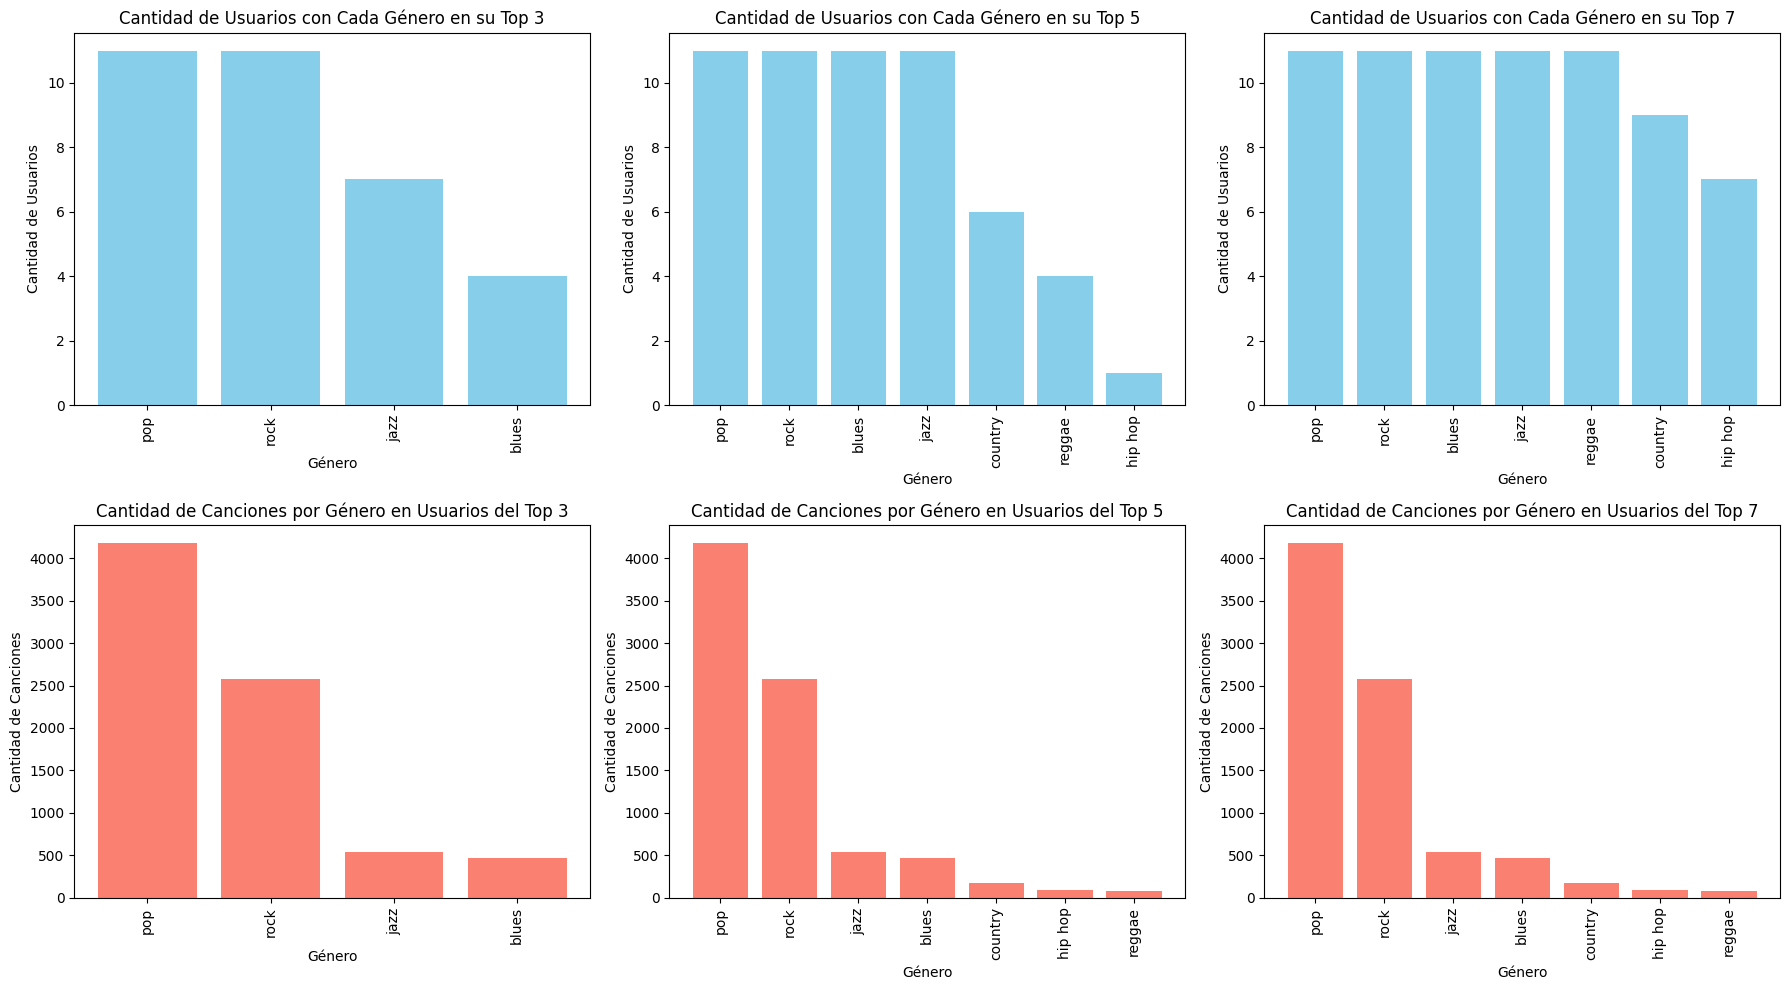

In [33]:
import matplotlib.pyplot as plt

# Supongamos que ya tienes los DataFrames para K = 3, 5, y 7
# Ejemplo: top_k_3_categories, top_k_5_categories, top_k_7_categories

# Lista de DataFrames y valores de K para iterar
top_k_dfs = [top_k_3_categories, top_k_5_categories, top_k_7_categories]
k_values = [3, 5, 7]

# Crear la figura y los ejes para la grilla de gráficos (2 filas, 3 columnas)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, (top_k_df, k) in enumerate(zip(top_k_dfs, k_values)):
    # Gráfico 1: Cantidad de usuarios que tienen cada género en su top K
    genre_user_count = top_k_df['genre'].value_counts()
    axes[0, i].bar(genre_user_count.index, genre_user_count.values, color='skyblue')
    axes[0, i].set_title(f"Cantidad de Usuarios con Cada Género en su Top {k}")
    axes[0, i].set_xlabel("Género")
    axes[0, i].set_ylabel("Cantidad de Usuarios")
    axes[0, i].tick_params(axis='x', rotation=90)

    # Filtrar el DataFrame original para incluir solo los géneros que están en el top K de cada usuario
    top_genres = top_k_df['genre'].unique()
    filtered_df = usuario_music_data[usuario_music_data['genre'].isin(top_genres)]

    # Gráfico 2: Cantidad de canciones por género en usuarios del top K
    genre_song_count = filtered_df['genre'].value_counts()
    axes[1, i].bar(genre_song_count.index, genre_song_count.values, color='salmon')
    axes[1, i].set_title(f"Cantidad de Canciones por Género en Usuarios del Top {k}")
    axes[1, i].set_xlabel("Género")
    axes[1, i].set_ylabel("Cantidad de Canciones")
    axes[1, i].tick_params(axis='x', rotation=90)

# Ajustar el layout para mejor visualización
plt.tight_layout()
plt.show()


Vemos que la diversida entre los generos aumente significativamente entre el k=3 y k=5. Pero vemos que la diversidad no aumenta al usar k=7 y k=5. Por lo que seria mejor usar k=5, ya que es mas eficiente porque son menos vcategorias que proecuparse pero mas diversida alfinal que k=3.

Un valor de K más alto (como K=5) podría ser mejor si el objetivo es incrementar la **diversidad** en las recomendaciones, ya que permite incluir géneros menos escuchados en las listas de preferencias de los usuarios. De una manera eficiente.

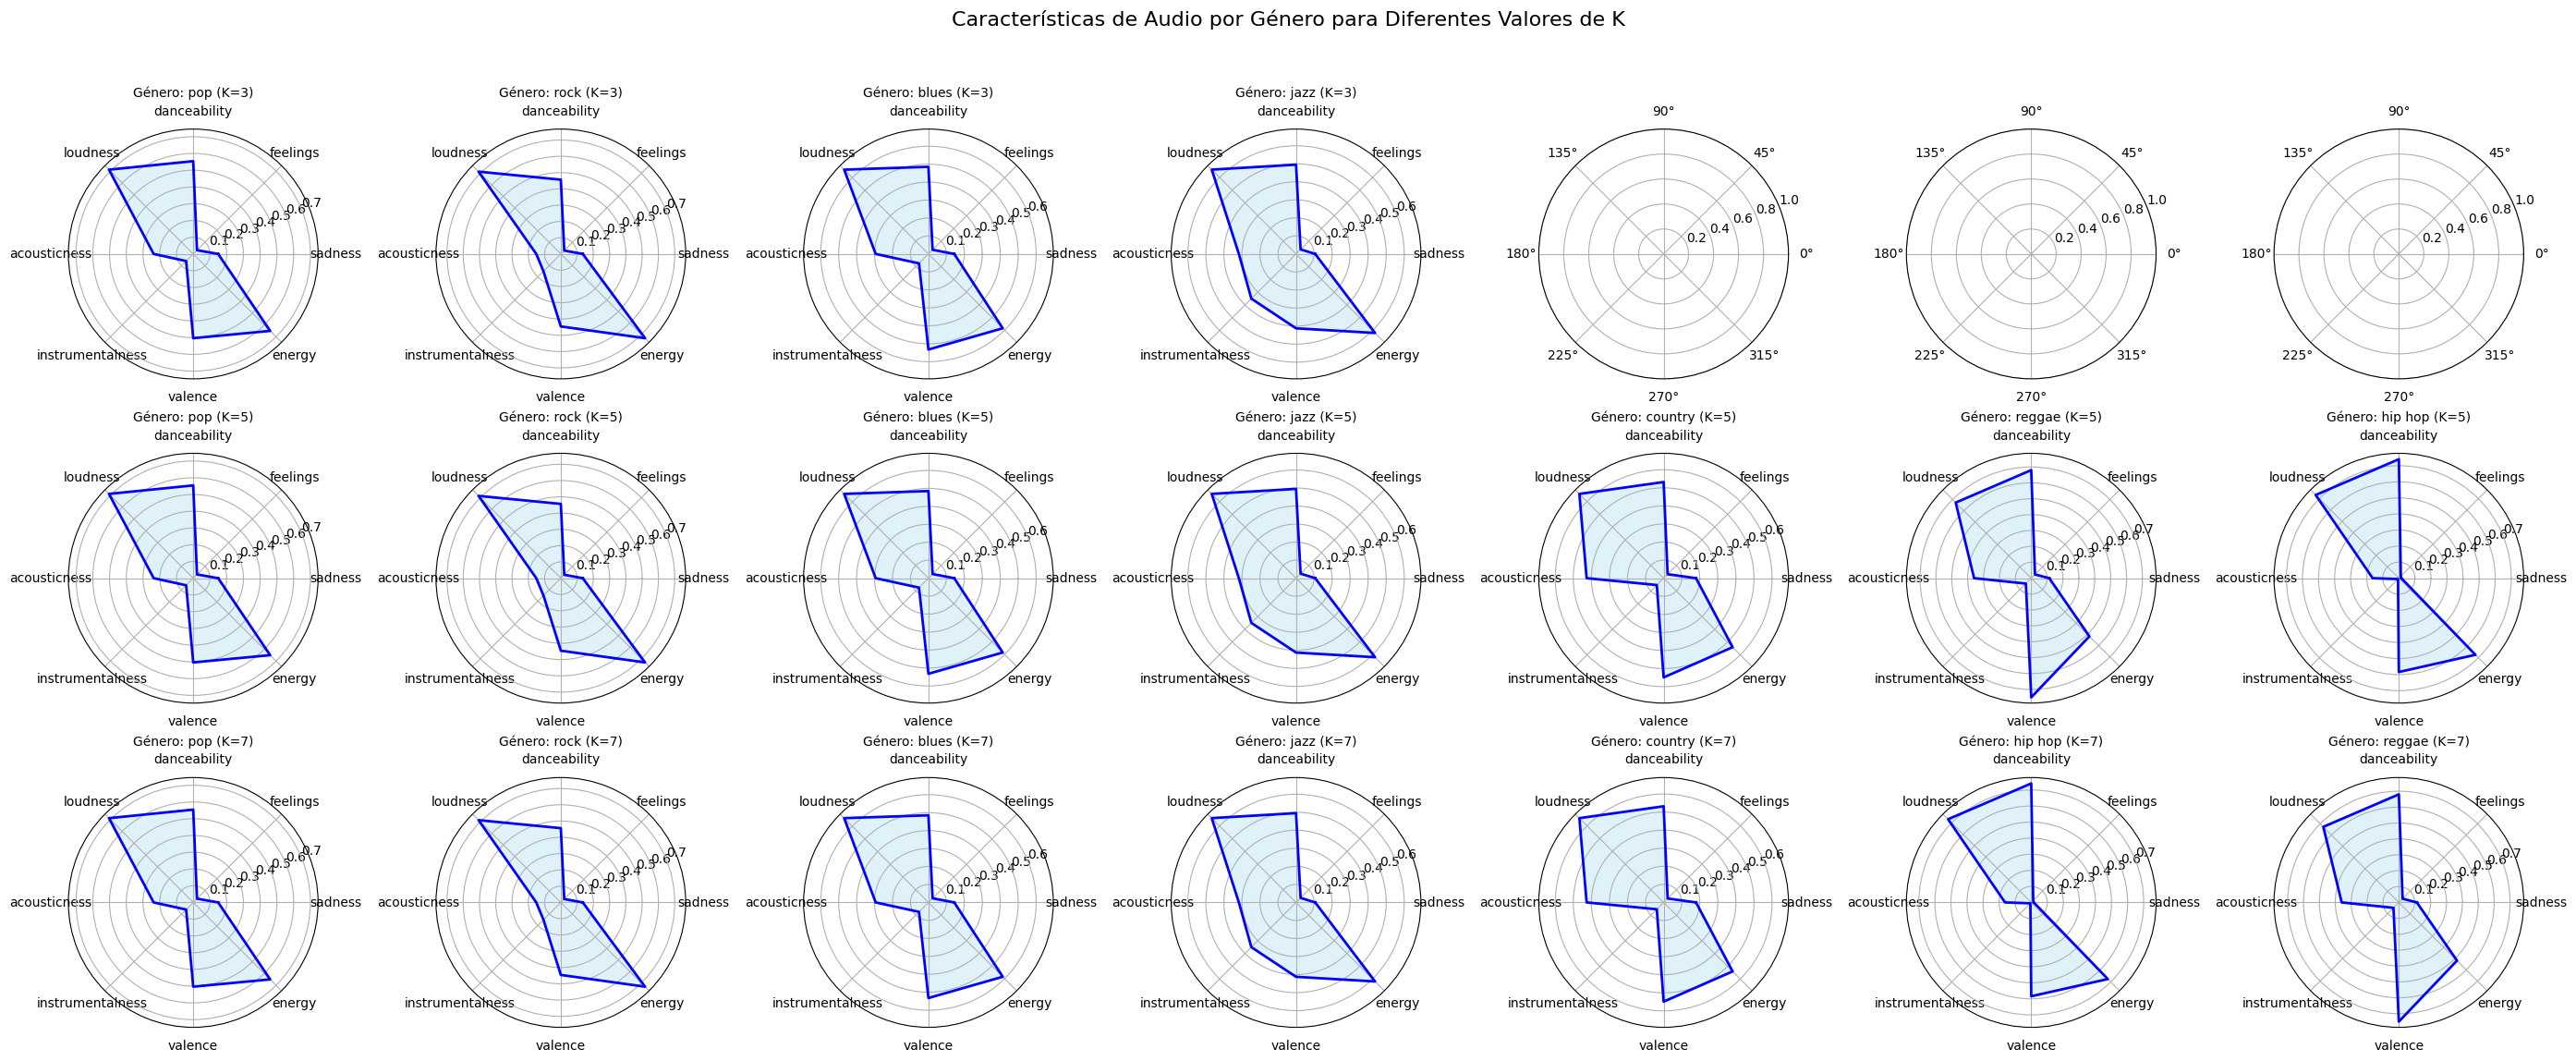

In [41]:
import numpy as np

# Supongamos que ya tienes los DataFrames top_k_3_categories, top_k_5_categories y top_k_7_categories
# Y que usuario_music_data es el DataFrame completo con todas las columnas

# Lista de DataFrames y valores de K
top_k_dfs = [top_k_3_categories, top_k_5_categories, top_k_7_categories]
k_values = [3, 5, 7]

# Lista de características de audio
audio_features = ['sadness', 'feelings', 'danceability', 'loudness', 'acousticness',
                  'instrumentalness', 'valence', 'energy']

# Determinar el número máximo de géneros en el top K entre los diferentes K
max_num_genres = max(len(df['genre'].unique()) for df in top_k_dfs)

# Crear la figura y ejes para la grilla
fig, axes = plt.subplots(len(k_values), max_num_genres, figsize=(4*max_num_genres, 4*len(k_values)), subplot_kw=dict(polar=True))
fig.suptitle("Características de Audio por Género para Diferentes Valores de K", fontsize=16)

# Asegurarse de que axes sea una matriz bidimensional, incluso si hay solo una fila o columna
if len(k_values) == 1 or max_num_genres == 1:
    axes = np.array(axes).reshape(len(k_values), max_num_genres)

# Iterar por cada valor de K y cada género
for row, (top_k_df, k) in enumerate(zip(top_k_dfs, k_values)):
    # Obtener géneros únicos en el top K de cada usuario
    top_genres = top_k_df['genre'].unique()

    # Filtrar el DataFrame original para incluir solo las canciones de los géneros en el top K
    filtered_df = usuario_music_data[usuario_music_data['genre'].isin(top_genres)]

    # Calcular el promedio de cada característica de audio para cada género en el top K
    genre_audio_features = filtered_df.groupby('genre')[audio_features].mean()

    for col, genre in enumerate(top_genres):
        if col >= max_num_genres:  # Si excede el número de columnas en la grilla, omitir
            break
        if genre in genre_audio_features.index:  # Asegurarse de que el género esté en el DataFrame
            # Datos para el gráfico de radar
            labels = genre_audio_features.columns
            stats = genre_audio_features.loc[genre].values

            # Configuración del ángulo de cada eje
            num_vars = len(labels)
            angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
            stats = np.concatenate((stats, [stats[0]]))
            angles += angles[:1]

            # Crear el gráfico de radar en la grilla
            ax = axes[row, col]
            ax.fill(angles, stats, color='skyblue', alpha=0.25)
            ax.plot(angles, stats, color='blue', linewidth=2)
            ax.set_xticks(angles[:-1])
            ax.set_xticklabels(labels)
            ax.set_title(f"Género: {genre} (K={k})", fontsize=10)

# Ajustar el layout para evitar solapamientos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajusta el espacio para el título
plt.show()


Incrementar K permite recomendar géneros con características auditivas diversas. Esto es valioso para una métrica de diversidad, ya que puedes medir no solo la frecuencia de los géneros, sino también la variedad en las características de audio que estos géneros aportan a la experiencia del usuario.

Para una métrica de diversidad, puedes considerar cómo los valores de danceability, acousticness, instrumentalness, etc., varían entre los géneros recomendados, incentivando la exploración de perfiles auditivos únicos para cada usuario.

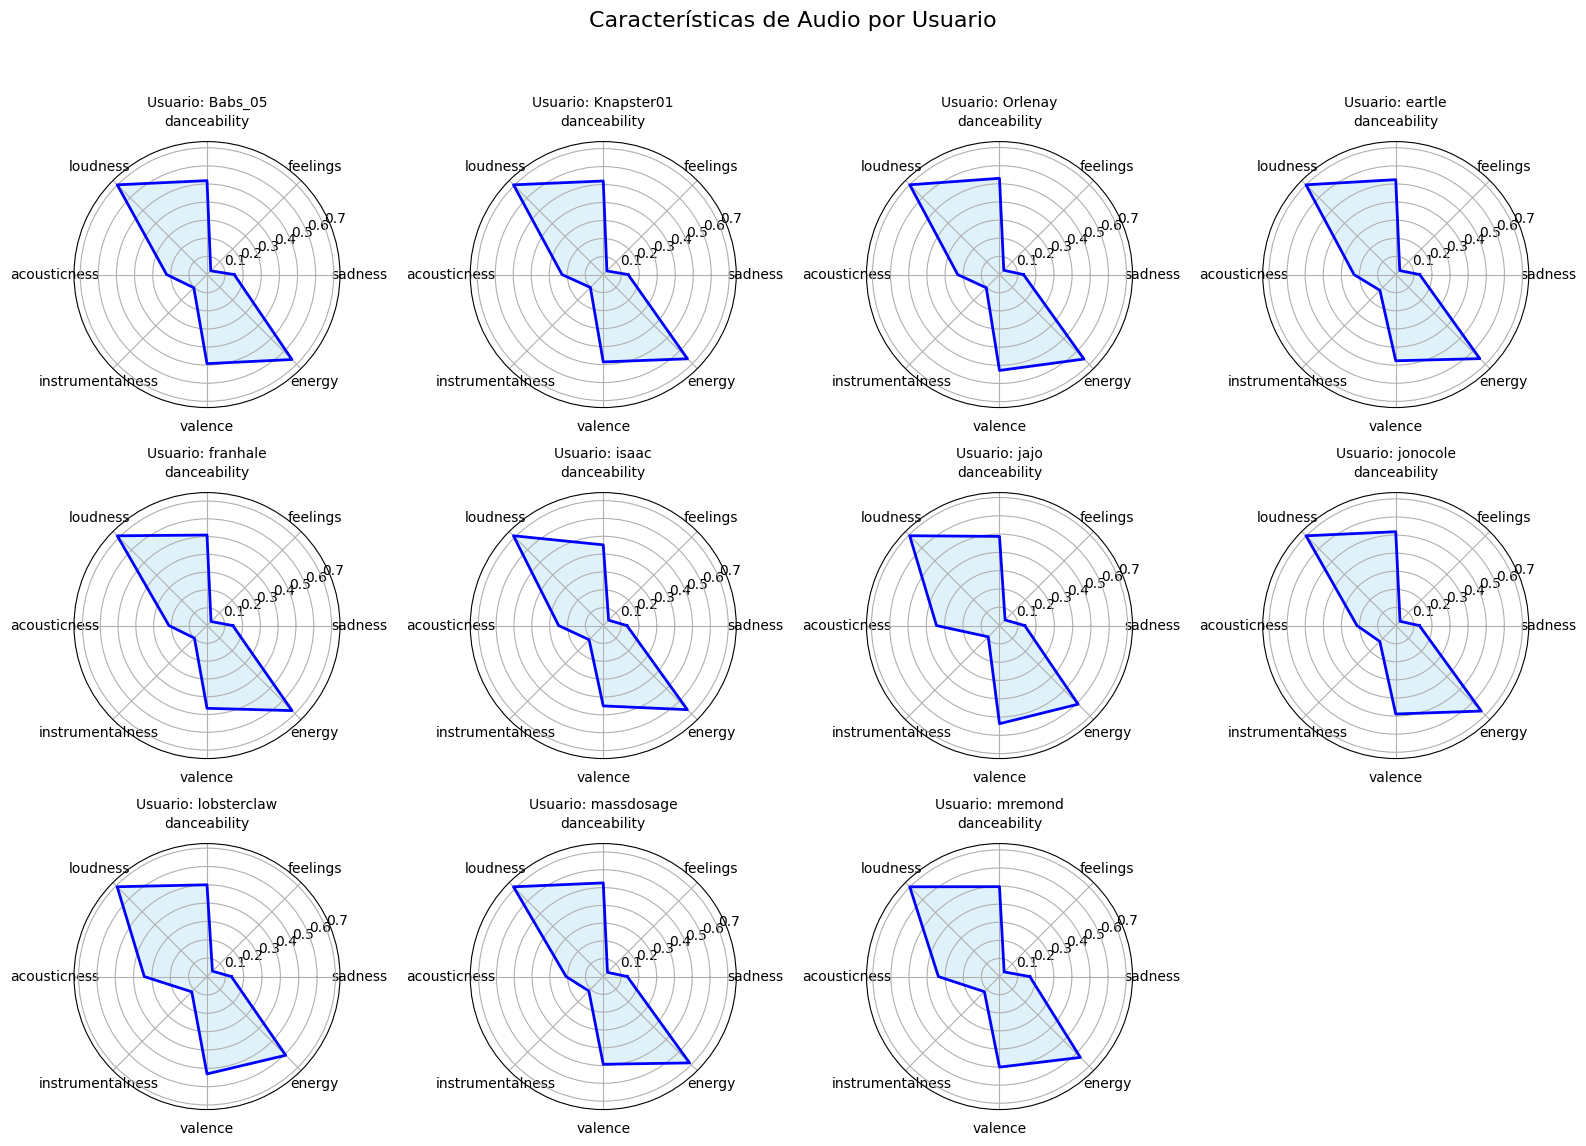

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Lista de características de audio
audio_features = ['sadness', 'feelings', 'danceability', 'loudness', 'acousticness',
                  'instrumentalness', 'valence', 'energy']

# Calcular el promedio de cada característica de audio para cada usuario
user_audio_features = usuario_music_data.groupby('Username')[audio_features].mean()

# Configuración de la grilla de gráficos
num_users = user_audio_features.shape[0]
num_cols = 4  # Número de columnas en la grilla (ajusta según tus preferencias)
num_rows = int(np.ceil(num_users / num_cols))  # Número de filas necesario

fig, axes = plt.subplots(num_rows, num_cols, figsize=(4*num_cols, 4*num_rows), subplot_kw=dict(polar=True))
fig.suptitle("Características de Audio por Usuario", fontsize=16)

# Asegurarse de que axes sea una matriz bidimensional
axes = np.array(axes).reshape(num_rows, num_cols)

# Iterar por cada usuario y crear un gráfico de radar
for i, (username, row) in enumerate(user_audio_features.iterrows()):
    row_data = row.values
    labels = user_audio_features.columns

    # Configuración del ángulo de cada eje
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    row_data = np.concatenate((row_data, [row_data[0]]))
    angles += angles[:1]

    # Ubicación de la gráfica en la grilla
    ax = axes[i // num_cols, i % num_cols]
    ax.fill(angles, row_data, color='skyblue', alpha=0.25)
    ax.plot(angles, row_data, color='blue', linewidth=2)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_title(f"Usuario: {username}", fontsize=10)

# Ocultar gráficos vacíos en la grilla
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j // num_cols, j % num_cols])

# Ajustar el layout para evitar solapamientos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajusta el espacio para el título
plt.show()


Vemos que las estructuras de cada usuario son parecidad al top 3 de categorias que son pop, rock y blues. Sin embargo tambien hay usuarios que les importa la acustica la que esta en generos con k igual a 5 o 7.